#

# Graphviz

In [2]:
# 필요한 라이브러리 호출
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedGroupKFold
import graphviz
import numpy as np
import pandas as pd

In [3]:
# 데이터셋 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target
print('iris target값: ',iris_label)
print('iris target명: ',iris.target_names)

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()


iris target값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명:  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_data,iris_label,test_size=0.2,random_state=11)

dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train,y_train)

pred = dt_clf.predict(X_test)

## export_graphviz 함수: graphviz 라이브러리랑 연동할 수 있게 만드는 함수

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='./tree.dot', class_names = iris.target_names,feature_names=iris.feature_names, impurity=True,filled=True)

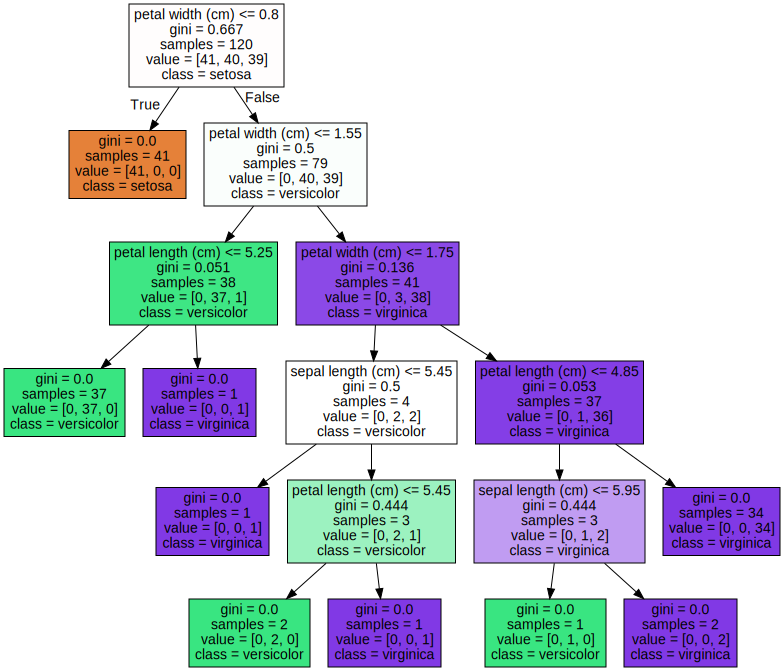

In [6]:
import graphviz

with open(r"./tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# gini 지니계수 0 : 순수

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,test_size=0.2,random_state=11)

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=11)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)

## 속성 정리

* max_depth

In [8]:
X_train, X_test, y_train, y_test =  train_test_split(iris_data, iris_label, 
                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=11)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

In [9]:
export_graphviz(dt_clf, out_file="tree.dot", class_names= iris.target_names, 
            feature_names=iris.feature_names, impurity=True, filled=True)


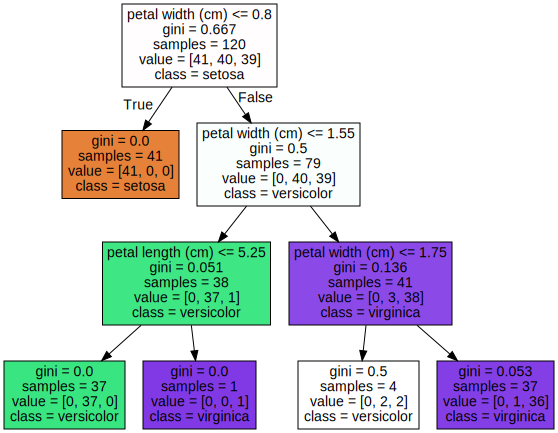

In [10]:
import graphviz

with open(r"tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* min_samples_split : 분할이 될 수 있는 노드의 최소 데이터의 개수

In [11]:
X_train, X_test, y_train, y_test =  train_test_split(iris_data, iris_label, 
                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(min_samples_split = 4, random_state=11)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

In [12]:
export_graphviz(dt_clf, out_file="tree.dot", class_names= iris.target_names, 
            feature_names=iris.feature_names, impurity=True, filled=True)


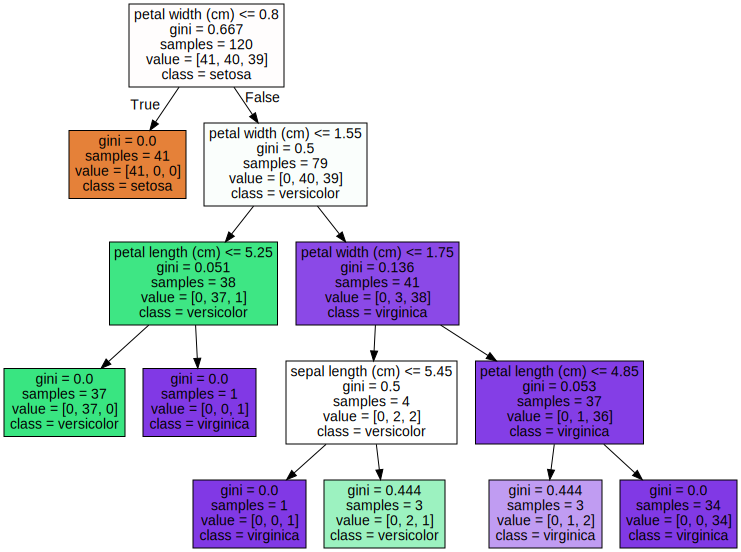

In [13]:
import graphviz

with open(r"tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* min_samples_leaf : 해당 개수의 클래스가 하나라도 존재해야 분기

In [14]:
X_train, X_test, y_train, y_test =  train_test_split(iris_data, iris_label, 
                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(min_samples_leaf = 3, random_state=11)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

In [15]:
export_graphviz(dt_clf, out_file="tree.dot", class_names= iris.target_names, 
            feature_names=iris.feature_names, impurity=True, filled=True)


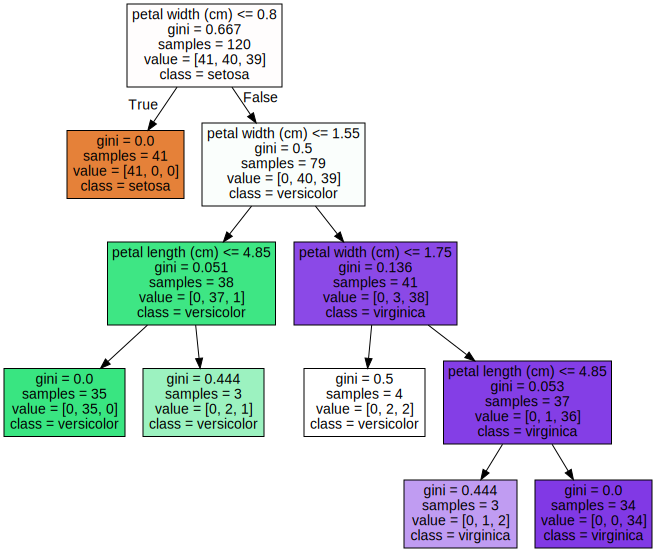

In [16]:
import graphviz

with open(r"tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* featrue_importance

feature importances:[0.    0.    0.016 0.984]
sepal length (cm):0.000
sepal width (cm):0.000
petal length (cm):0.016
petal width (cm):0.984


<Axes: >

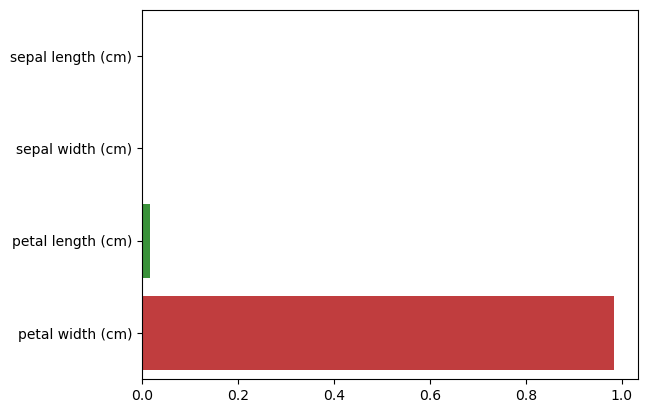

In [19]:
from sklearn.datasets import load_iris
import seaborn as sns
import numpy as np

iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# feature importance 추출
print('feature importances:{0}'.format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))
    
#feature importance column별로 시각화
sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)


* 결정 트리(Decision Tree) 과적합

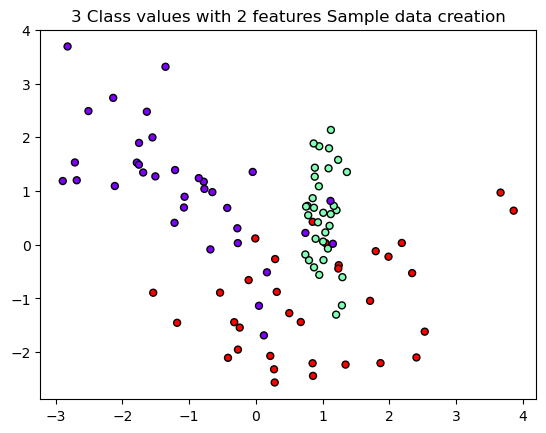

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title('3 Class values with 2 features Sample data creation')

X_features, y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2,n_classes=3,n_clusters_per_class=1,random_state=0)

'''
n_samples : 표본 데이터의 수, 디폴트 100
n_features : 독립 변수의 수, 디폴트 20
n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
(noise같은 경우?)
n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
n_classes : 종속 변수의 클래스 수, 디폴트 2
n_clusters_per_class : 클래스당 클러스터의 수, 디폴트 2
weights : 각 클래스에 할당된 표본 수
random_state : 난수 발생 시드
'''
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [ ]:
import numpy as np
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
            clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                        levels=np.arange(n_classes + 1) - 0.5,
                        cmap='rainbow', clim=(y.min(), y.max()),zorder=1)


/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_7340/3026373350.py:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


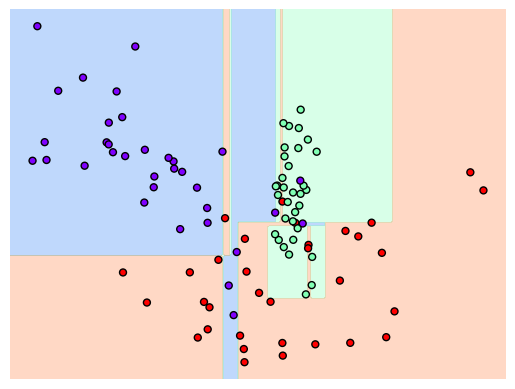

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 제약조건 없음
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)


/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_7340/3026373350.py:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


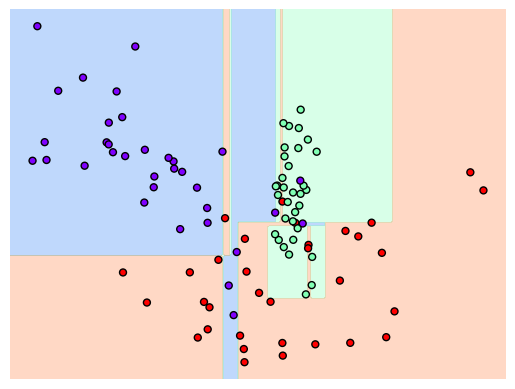

In [ ]:
#제약조건 min_sample_leafs

dt_clf2 = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)